1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


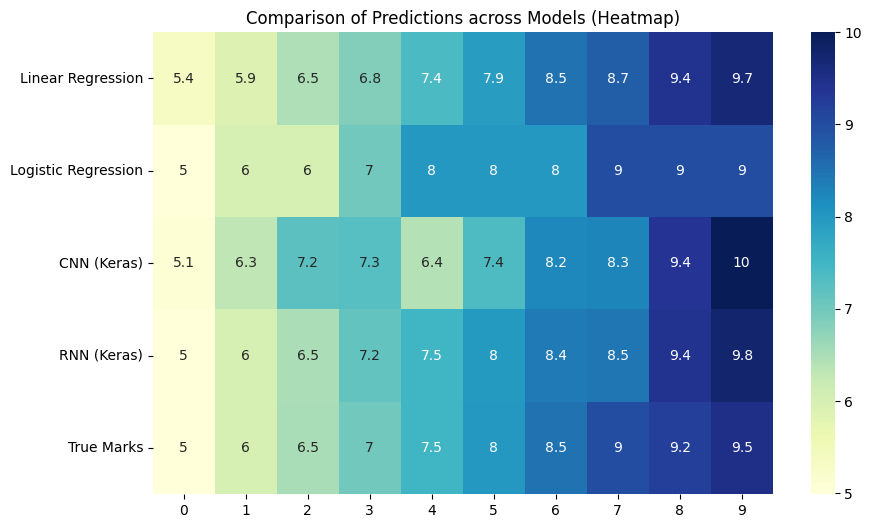

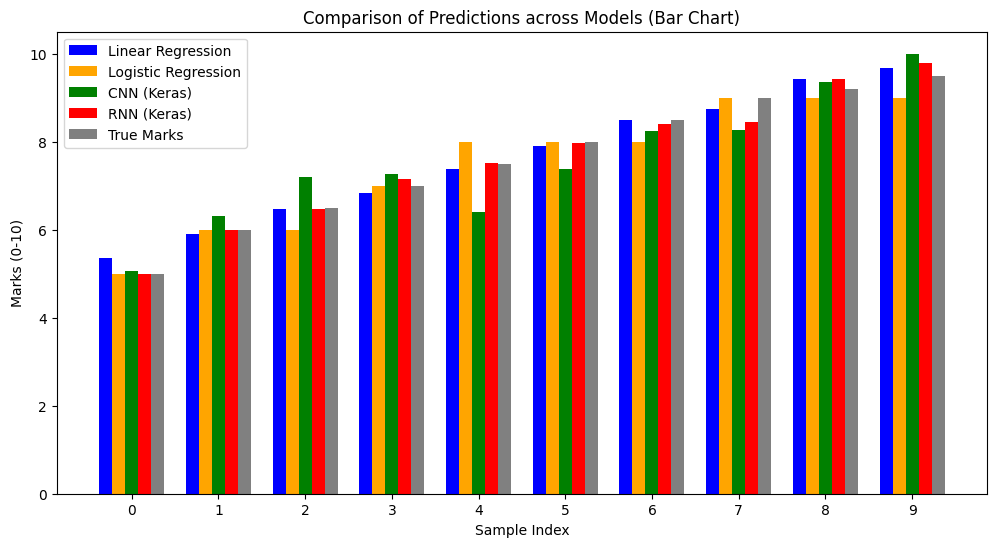

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk
from tkinter import ttk

# Data: Study hours, Class Type, Number of Assignments Completed, and Behavior Score (Điểm rèn luyện)
study_hours = np.array([[5], [10], [15], [20], [25], [30], [35], [40], [45], [50]])
class_type = ['Online', 'Offline', 'Offline', 'Online', 'Online', 'Offline', 'Offline', 'Online', 'Offline', 'Online']
assignments_completed = np.array([[2], [4], [3], [5], [5], [6], [7], [8], [9], [10]])
behavior_score = np.array([[70], [80], [60], [90], [85], [75], [95], [88], [100], [92]])  # Điểm rèn luyện từ 1 đến 100

# Student marks (scaled between 0 and 10)
marks = np.array([5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.2, 9.5])

# One-Hot Encoding for Class Type
encoder = OneHotEncoder()
class_type_encoded = encoder.fit_transform(np.array(class_type).reshape(-1, 1)).toarray()

# Combine the data into a matrix
X = np.hstack([np.array(study_hours).reshape(-1, 1),
               assignments_completed,
               behavior_score,
               class_type_encoded])

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_scaled, marks)

# Create Logistic Regression model with more iterations
logistic_model = LogisticRegression(max_iter=2000, solver='lbfgs')
logistic_model.fit(X_scaled, np.round(marks))  # Logistic Regression requires discrete labels

# ---- CNN and RNN Models using TensorFlow thuần ----

# CNN Model (TensorFlow thuần)
def build_cnn_tensor(input_shape):
    model = tf.Variable(tf.random.normal([input_shape[0], input_shape[1], 64], stddev=0.03))

    # Layer 1: Convolution
    conv1 = tf.nn.conv1d(input=model, filters=tf.Variable(tf.random.normal([2, 64, 32], stddev=0.03)), stride=1, padding='SAME')
    conv1 = tf.nn.relu(conv1)

    # Layer 2: MaxPooling
    max_pool = tf.nn.max_pool1d(input=conv1, ksize=2, strides=2, padding='SAME')

    # Flatten Layer
    flatten = tf.reshape(max_pool, [-1, input_shape[0] * input_shape[1]])

    # Fully connected layer
    dense = tf.Variable(tf.random.normal([input_shape[0] * input_shape[1], 50], stddev=0.03))
    dense_out = tf.nn.relu(tf.matmul(flatten, dense))

    # Output Layer
    output_weights = tf.Variable(tf.random.normal([50, 1], stddev=0.03))
    output = tf.matmul(dense_out, output_weights)

    return output

# RNN Model (TensorFlow thuần)
def build_rnn_tensor(input_shape):
    inputs = tf.Variable(tf.random.normal([input_shape[0], input_shape[1], 50], stddev=0.03))

    # RNN Cell
    rnn_cell = tf.keras.layers.SimpleRNNCell(50, activation='relu')
    rnn_outputs, _ = tf.keras.layers.RNN(rnn_cell)(inputs)

    # Output Layer
    output_weights = tf.Variable(tf.random.normal([50, 1], stddev=0.03))
    output = tf.matmul(rnn_outputs, output_weights)

    return output

# ---- CNN and RNN Models using Keras ----

# CNN Model (Keras)
def build_cnn_keras(input_shape):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=input_shape))  # Use Input layer to define input shape
    model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
    model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(50, activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# RNN Model (Keras)
def build_rnn_keras(input_shape):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=input_shape))  # Use Input layer to define input shape
    model.add(tf.keras.layers.SimpleRNN(50, activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Prepare data for CNN and RNN (reshape)
X_cnn_rnn = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Build and train CNN model using Keras
cnn_model_keras = build_cnn_keras((X_cnn_rnn.shape[1], 1))
cnn_model_keras.fit(X_cnn_rnn, marks, epochs=200, verbose=0)

# Build and train RNN model using Keras
rnn_model_keras = build_rnn_keras((X_cnn_rnn.shape[1], 1))
rnn_model_keras.fit(X_cnn_rnn, marks, epochs=200, verbose=0)

# Function to constrain predictions between 0 and 10
def constrain_prediction(prediction):
    return max(0, min(10, prediction))

# Prediction function for marks based on user inputs
def predict_marks():
    user_hours = float(entry_hours.get())  # Get the study hours from the input field
    user_assignments = float(entry_assignments.get())  # Get the number of completed assignments
    user_behavior_score = float(entry_behavior_score.get())  # Get the behavior score (Điểm rèn luyện)
    user_class_type = combo_class_type.get()  # Get the class type from the dropdown

    # Encode user class type
    user_class_encoded = encoder.transform([[user_class_type]]).toarray()

    # Combine the inputs into a data array
    input_data = np.hstack([[[user_hours]], [[user_assignments]], [[user_behavior_score]], user_class_encoded])

    # Scale the input data
    input_data_scaled = scaler.transform(input_data)
    input_data_cnn_rnn = input_data_scaled.reshape((1, input_data_scaled.shape[1], 1))

    # Predict marks using Linear Regression
    predicted_marks_linear = constrain_prediction(linear_model.predict(input_data_scaled)[0])

    # Predict marks using Logistic Regression
    predicted_marks_logistic = constrain_prediction(logistic_model.predict(input_data_scaled)[0])

    # Predict marks using CNN (Keras)
    predicted_marks_cnn_keras = constrain_prediction(cnn_model_keras.predict(input_data_cnn_rnn)[0][0])

    # Predict marks using RNN (Keras)
    predicted_marks_rnn_keras = constrain_prediction(rnn_model_keras.predict(input_data_cnn_rnn)[0][0])

    # Display the results
    label_result.config(text=f'Linear Regression Predicted Marks: {predicted_marks_linear:.2f}/10\n'
                             f'Logistic Regression Predicted Marks: {predicted_marks_logistic:.2f}/10\n'
                             f'CNN (Keras) Predicted Marks: {predicted_marks_cnn_keras:.2f}/10\n'
                             f'RNN (Keras) Predicted Marks: {predicted_marks_rnn_keras:.2f}/10')

# Compare models with heatmap and bar chart
def compare_models():
    # Predictions for the training data
    predicted_marks_linear = [constrain_prediction(p) for p in linear_model.predict(X_scaled)]
    predicted_marks_logistic = [constrain_prediction(p) for p in logistic_model.predict(X_scaled)]
    predicted_marks_cnn_keras = [constrain_prediction(cnn_model_keras.predict(X_cnn_rnn)[i][0]) for i in range(len(marks))]
    predicted_marks_rnn_keras = [constrain_prediction(rnn_model_keras.predict(X_cnn_rnn)[i][0]) for i in range(len(marks))]

    # Create a comparison matrix for heatmap
    comparison_matrix = np.array([predicted_marks_linear,
                                  predicted_marks_logistic,
                                  predicted_marks_cnn_keras,
                                  predicted_marks_rnn_keras,
                                  marks])

    # Plot heatmap to compare models
    plt.figure(figsize=(10, 6))
    sns.heatmap(comparison_matrix, annot=True, cmap="YlGnBu", cbar=True,
                yticklabels=['Linear Regression', 'Logistic Regression', 'CNN (Keras)', 'RNN (Keras)', 'True Marks'])
    plt.title('Comparison of Predictions across Models (Heatmap)')
    plt.show()

    # Plot bar chart to compare models
    labels = ['Linear Regression', 'Logistic Regression', 'CNN (Keras)', 'RNN (Keras)', 'True Marks']
    x = np.arange(len(marks))  # positions for each bar
    width = 0.15  # bar width

    plt.figure(figsize=(12, 6))
    plt.bar(x - 2*width, predicted_marks_linear, width, label='Linear Regression', color='blue')
    plt.bar(x - width, predicted_marks_logistic, width, label='Logistic Regression', color='orange')
    plt.bar(x, predicted_marks_cnn_keras, width, label='CNN (Keras)', color='green')
    plt.bar(x + width, predicted_marks_rnn_keras, width, label='RNN (Keras)', color='red')
    plt.bar(x + 2*width, marks, width, label='True Marks', color='gray')

    plt.xlabel('Sample Index')
    plt.ylabel('Marks (0-10)')
    plt.title('Comparison of Predictions across Models (Bar Chart)')
    plt.xticks(x)
    plt.legend()
    plt.show()

# Create the GUI window
window = tk.Tk()
window.title("Student Marks Prediction Based on Study Data")

# Label and entry for study hours
label_hours = tk.Label(window, text="Enter study hours:")
label_hours.pack()
entry_hours = tk.Entry(window)
entry_hours.pack()

# Label and entry for number of assignments completed
label_assignments = tk.Label(window, text="Enter number of assignments completed:")
label_assignments.pack()
entry_assignments = tk.Entry(window)
entry_assignments.pack()

# Label and entry for behavior score (Điểm rèn luyện)
label_behavior_score = tk.Label(window, text="Enter behavior score [1-100]:")
label_behavior_score.pack()
entry_behavior_score = tk.Entry(window)
entry_behavior_score.pack()

# Label and dropdown for class type
label_class_type = tk.Label(window, text="Select class type:")
label_class_type.pack()

combo_class_type = ttk.Combobox(window, values=class_type)
combo_class_type.pack()

# Button to predict marks
btn_predict = tk.Button(window, text="Predict Marks", command=predict_marks)
btn_predict.pack()

# Button to compare models
btn_compare = tk.Button(window, text="Compare Models", command=compare_models)
btn_compare.pack()

# Label to display the results
label_result = tk.Label(window, text="Predicted Marks:")
label_result.pack()


# Run the GUI window
window.mainloop()
